

# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

  The No-show Appointments dataset came from different hospitals in Brazil. The dataset contains information on whether the patients showed up or not for their medical appointments. Also the dataset has over 100,000 medical appointments and, 14 features that facilitated to gather information from each patient.Thus, I am inrerested in understanding about patients who missed their medical appointments. Here are my four research questions: Which age group did miss the appointments the most? Which gender did miss the appointments the most? Did the location of the hospital have an impact on patients to miss appointments? and Did SMS-received have any influance on no-show up? 


## Import Packages

Before doing any data wrangling, we have to import all necessary python packages such as pandas, numpy and data visualization tools. Also we import %matplotlib inline  for embedding graph in a notebook

In [1]:
# Import python packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.style.use("ggplot")

<a id='wrangling'></a>
## Data Wrangling

 The first thing in the data wrangling process is acquiring datasets from different sources into a notebook. In this case, I imported a csv file using pd.read_csv() module, then displayed a few rows of the dataset with .head(). 



In [2]:
# Load your data
df = pd.read_csv("noshowappointments.csv")

# Display a few rows of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Let's check out the shape, number of rows and columns,  of the dataset

In [3]:
# How many rows and columns are in this data
df.shape

(110527, 14)

#### df.info() gives us  all information we need about the dataset like number of rows, number of nun-null values in each column, datatypes of each column

In [4]:
# Display datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Let's check out the missing values in each column

In [5]:
# Features with missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Let's check out the presence of the duplicate values in the dataset

In [6]:
# Duplicate rows in the dataset
df.duplicated().sum()

0

#### df.describe() gives us a brief statistical summary of the dataset with  numerical values

In [7]:
# statistical summary 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Let's check out how many unique values we have in each column

In [8]:
# The number of unique values in the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning 
The dataset needs some cleaning. Even though, there are no any missing values from columns and duplicated values of rows, There are too many 0s and -1 in the Age Column. So I am going to replace those values with Null values. Then drop them using .dropna() module.   I am interested in investigating a couple of independent variables. So I am going to drop some columns since I do not use them in the analysis of the No-show Appointments.

In [9]:
# Drop the columns
df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap" ], axis=1,  inplace= True)
df.head(5)

,Gender,Age,Neighbourhood,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,No
1,M,56,JARDIM DA PENHA,0,No
2,F,62,MATA DA PRAIA,0,No
3,F,8,PONTAL DE CAMBURI,0,No
4,F,56,JARDIM DA PENHA,0,No


##### Let's determine how many 0s and -1s in Age Column of the dataset

In [10]:
print(df.Age.value_counts().head(1)); print(df.Age.value_counts().tail(1))

0    3539
Name: Age, dtype: int64
-1    1
Name: Age, dtype: int64


#### After determining the number 0s, -1s and outlier (115), we replace them with NAN values. Then drop the NAN values using .dropna() 

In [11]:
df.Age = df.Age.replace([0, -1, 115], np.nan)

In [12]:
df.Age.value_counts(dropna = False).head(5)

NaN     3545
1.0     2273
52.0    1746
49.0    1652
53.0    1651
Name: Age, dtype: int64

In [13]:
df.dropna(inplace= True)

##### Confirm  the change of dropping null values from the dataset

In [14]:
df.Age.value_counts(dropna=False)

1.0      2273
52.0     1746
49.0     1652
53.0     1651
56.0     1635
         ... 
97.0       11
98.0        6
100.0       4
102.0       2
99.0        1
Name: Age, Length: 101, dtype: int64

#### Let's display histogram of the numerical values of the columns

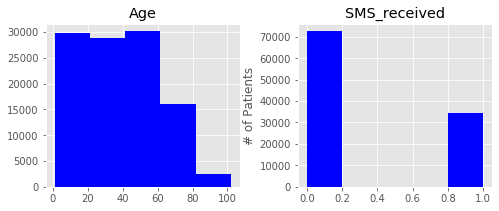

In [15]:

df.hist(figsize=(8,3),bins=5, color = "Blue" )
plt.ylabel("# of Patients");

#### The plot of value counts of the Gender column

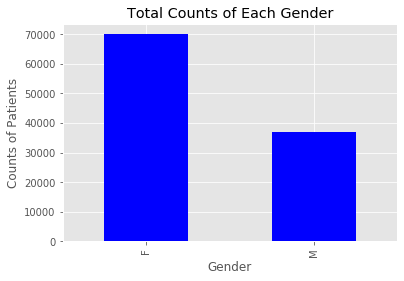

In [16]:
# Value count of each geder entity
df.Gender.value_counts().plot.bar(color = "Blue")
plt.xlabel("Gender")
plt.ylabel("Counts of Patients")
plt.title("Total Counts of Each Gender");

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which age group did miss the appointments the most?



#### Filter noshow up patients for medical appointments from the dataset and plot a histogram of an Age column

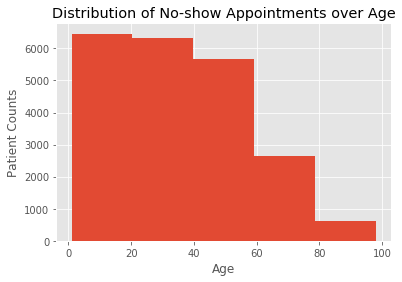

In [17]:
# Filter noshow up from dataset
noshow = df[df["No-show"] == "Yes"]
show_up = df[df["No-show"] == "No"]

noshow.Age.hist(bins = 5)
plt.xlabel("Age")
plt.ylabel("Patient Counts")
plt.title("Distribution of No-show Appointments over Age");

### Research Question 2:  Which gender did miss the appointments the most? 

#### Plot a pie chart of a Gender column value counts for for noshow up patients

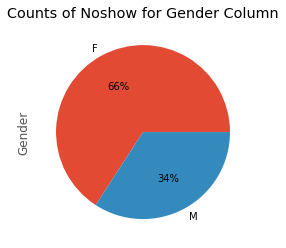

In [18]:
# Value counts of gender for noshow patients
noshow.Gender.value_counts().plot.pie(autopct= "%.f%%" )
plt.title("Counts of Noshow for Gender Column");


### Research Question 3:  Did the location of the hospital have an impact on patients to miss appointments? 

#### Plot a bar graph of a Neighbourhood column value counts for noshow up patients

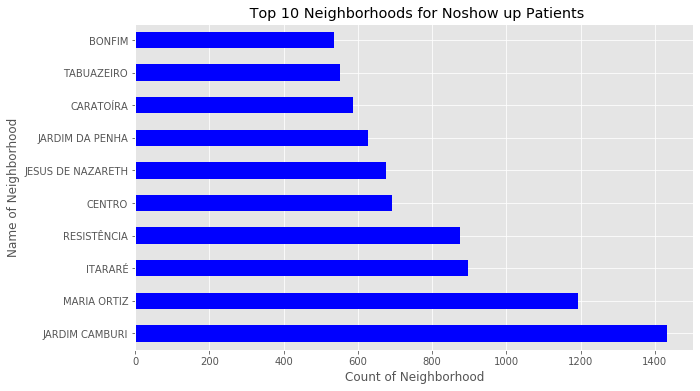

In [19]:
# The top 10 hospital locations where patients missed their appointments the most
noshow.Neighbourhood.value_counts()[:10].plot.barh(figsize= (10, 6), color = "Blue")
plt.xlabel("Count of Neighborhood")
plt.ylabel("Name of Neighborhood")
plt.title(" Top 10 Neighborhoods for Noshow up Patients");


### Research Question 4:  Did SMS-received have any influance on no-show up?

#### First groupby a Gender column of noshow and the whole dataset, then plot a bar gragh of a SMS_received column of them

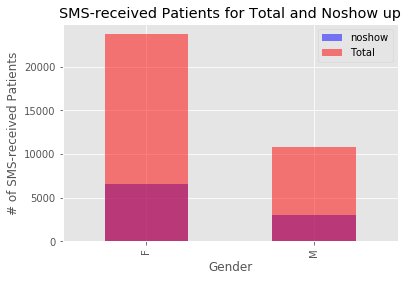

In [20]:
# SMS received patients
noshow.groupby("Gender").sum()["SMS_received"].plot.bar(color= "blue", alpha = 0.5, label = "noshow")
df.groupby("Gender").sum()["SMS_received"].plot.bar(color='red', alpha= 0.5, label = "Total")
plt.legend()
plt.ylabel("# of SMS-received Patients")
plt.title("SMS-received Patients for Total and Noshow up");

<a id='conclusions'></a>
## Conclusions

The first thing I wanted to investigate was that how an age of patients had affected them to miss the appointments.The graph shows that more young generations under 40 had missed the medical appointments.The second research question was about gender and more female patients did not  show up for the appointment, but the total population of female patients were almost double that of male. Do we really care about the location of the hospitals in this analysis? Yes definetely, patients from Jardim Camburi neighborhood missed the appointments the most. But why is it this neighboorhood? we can make more researches whether patients lives too far  or other reasons they may have. Finally, the hospitals had sent out the SMS messages to remind their appointments and still about 25% of patients from each group missed the appointments. it is helpful to use other media in addtion to SMS to improve the patients' attendances. The limitation of the analysis is that the presence of  too many 0s in age column. so I decided to convert those 0s to NAN, then dropped NAN values. I could have replaced NAN vales with mean or mode or median age value. Thus final analysis would be completely different.  


In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0